## Start

In [31]:
#import functions
#%pylab inline

# from MyUnits import *
from chicoFunctions import *
from qutip import *


# from MyQubit import *
# import mpld3
import multiprocessing as mp
import itertools
import datetime

import scipy.constants as sc

import time
import datetime


In [35]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from numpy import *
from qutip import *
from IPython.display import Image
from numpy.linalg import *
import multiprocessing  
from multiprocessing import Pool, cpu_count
import scipy.constants as sc
import time
import datetime
import os
from matplotlib import cm
import matplotlib as mpl


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/des01/rouxinol/asantana/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/ker

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [4]:
file='/Users/rouxinol/Dropbox/Electromechanical Systems/DATA/Flux Freq map full a'

In [5]:
file

'/Users/rouxinol/Dropbox/Electromechanical Systems/DATA/Flux Freq map full a'

In [5]:
X,Y,Amp,Phase=ImportXYZZ(file,0)

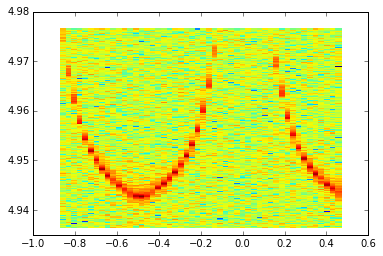

In [6]:
pcolor((X/14.902252)-0.2,0.0025+Y/(1e9),Amp.T)

In [10]:
three_level_ops()

NameError: name 'three_level_ops' is not defined

In [13]:
array([basis(3, 0), basis(3, 1), basis(3, 2)], dtype=object)

Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]]

In [15]:
qutrit_basis()

array([Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
       Qobj data =
       [[1.]
        [0.]
        [0.]]                                                                ,
       Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
       Qobj data =
       [[0.]
        [1.]
        [0.]]                                                                ,
       Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
       Qobj data =
       [[0.]
        [0.]
        [1.]]                                                                ],
      dtype=object)

In [18]:
one, two, three = qutrit_basis()
# Note that the three level operators are different
# from the qutrit operators. A three level atom only
# has transitions 1 <-> 2 <-> 3, so we define the
# operators seperately from the qutrit code
s11 = one * one.dag()
s22 = two * two.dag()
s33 = three * three.dag()
s12 = one * two.dag()
s32 = three * two.dag()

In [19]:
# Hamiltonians Functions
# Calc Spectrum
def calc_spectrum_6(N,M,P, w_c, w_nr, w_q, L, g, A, w=0, **kwargs):
    
    Ec = kwargs['Ec']
    # dispersive Qubit CPW NR 
    Delta = w_q - w_c
    delta = w_q - w_nr
    # qubit operators
    v1,v2,v3 = qutrit_basis()
    
    Ts11 = tensor(s11,qeye(M),qeye(P))
    Ts22 = tensor(s22,qeye(M),qeye(P))
    Ts33 = tensor(s33,qeye(M),qeye(P))
    Ts12 = tensor(s12,qeye(M),qeye(P))
    Ts32 = tensor(s32,qeye(M),qeye(P))
    
    Tv1 = tensor(v1,qeye(M),qeye(P))
    Tv2 = tensor(v2,qeye(M),qeye(P))
    Tv3 = tensor(v3,qeye(M),qeye(P))
    
    I = tensor(qeye(3),qeye(M),qeye(P))
    
    
#     sm = tensor(create(2),qeye(M),qeye(P))
#     sz = tensor(sigmaz(),qeye(M),qeye(P))
#     sx = tensor(sigmax(),qeye(M),qeye(P))
#     nq = sm.dag() * sm
#     xq = sm + sm.dag()
#     I = tensor(qeye(2), qeye(M),qeye(P))
    
    
    # mechanical resonator operators
    
    b = tensor(qeye(3),destroy(M),qeye(P))
    n_b = b.dag() * b
    x_b = b.dag() + b
    p_b = b - b.dag()
    
    
    # CPW operators
    
    c = tensor(qeye(3),qeye(M),destroy(P))
    n_c = c.dag() * c
    x_c = c.dag() + c
    p_c = c - c.dag()
    
    # Identity
    
    
    
#    Hamiltonian

    H3 = (0.996*w_q - w ) * Ts22 + (0.991*(2 * w_q - Ec) - 2*w) * Ts33 #The prefactors 0.995 and 0.99 were determined when comparing from the charge hamiltonian
        

    H1 = (w_nr - w) * (b.dag() * b) + L*(b.dag() * (Ts12 + sqrt(2) * Ts32.dag()) + b * (Ts12.dag() + sqrt(2) * Ts32))


    H2 = (w_c - w) * (c.dag() * c )  + g * (c.dag()*(Ts12 + sqrt(2) * Ts32.dag()) + c*(Ts12.dag() + sqrt(2) * Ts32))


    H4 = A * (c.dag() + c)
    
    H5 = 4e-4 * (c.dag()+c)*(b + b.dag())

    
#     Colapse Operators
    
    c_op_list = []
    
    kappa_n = 0.00025 # cavity
    #kappa_n =0.0004 # cavity
    #kappa_n =0.0012 # cavity
    #kappa_n =0.002 # cavity
    
    gamma_rel =  6.7e-05 # qubit  # qubit0.0002
    gamma_dep =  0.00068 # qubit # qubit 0.001
    
    Gamma_m = 0.023  # MR 0.01# MR
    

    
    Ta = 45e-3#k  60e-3 CPW
    Tq = 30e-3 #K Qubit
    
#     Tb = 30e-3 #k
#     Tb = 90e-3 #k
    Tb = 200e-3 #k Mechanical Resonator
#     Tb = 210e-3 #k
    
    
    
    n_th_a = 1/(exp(sc.h*w_c*1e9/(sc.k*Ta))-1)
    
    n_th_q = 1/(exp(sc.h*w_q*1e9/(sc.k*Tq))-1)
    
    if Tb == 0:
         n_th_b = 0
    else:
        
        n_th_b = 1/(exp(sc.h*w_nr*1e9/(sc.k*Tb))-1)
    
    # cavity
    c_op_list = []

    rate = kappa_n * (1 + n_th_a)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * c)

    rate = kappa_n * n_th_a
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * c.dag())

    rate = gamma_rel * (1 + n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts12 + sqrt(2) * Ts32.dag())
                        )

    rate = gamma_rel * (n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts12.dag() + sqrt(2) * Ts32)
                        )

    rate = gamma_dep / 2 * (1 + n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts22 + sqrt(2) * Ts33))
        
    rate = Gamma_m * (1 + n_th_b)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * b)

    rate = Gamma_m * n_th_b
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * b.dag())    
        
    
# Solution Type    
    if 'dispersive' in kwargs:
               
        H0 = H1 + H2 + H3 + H4 # + H5
        rho = steadystate(H0,c_op_list)
        rho_b = rho*n_b
#         rho_a = rho*sz
        rho_c = rho*c
        rho_d = rho*n_c
        rho_f = rho
        
        return rho_c.tr(), rho_b.tr(),rho_d.tr()
    
    if 'energies'in kwargs:
        H = H1 + H2 + H3 + H4 #+H5
        
        return H.eigenenergies() #+ H4
    

In [22]:
N = 2
M = 5 #5 NR
P = 5 #4 cavity
w_c = 4.94 #geometric 4.935
w_nr = 3.48 #geometric 3.402
g = 0.102 # 120 # coupling qubit -CPW
# L = 0.0003*4.5
# L = 0.0003*5.5
L = 0.0003*6.5
#L = 0.0003*7.5
Ej = 15.5 #geometric 13-16
Ec = 0.2 #geometric 0.226
w = 0
w_q_max = sqrt(8 * Ec * Ej) - Ec
print(w_q_max)
d = 0.05
A = (1/3)*0.0002# field aplitude

# phi = linspace(0,pi/2,200)
x_i,x_f = 0.3,0.33
phi = pi*linspace(x_i,x_f,40)
x_vec =  sqrt( 8 * Ec * Ej* abs(cos(phi))*sqrt(1+(d*tan(phi))**2) )-Ec

kwargs = {'num_cpus':11,'energies':1, 'Ec':Ec}

4.7799598391954925


In [24]:
# Energies

# variable to count the total number of tasks we need to do; used to create progress bar
task_count =len(x_vec)

# Check number of cpus to be used
if 'num_cpus' in kwargs:
    num_cpu = kwargs['num_cpus']
    if num_cpu == 1:
        print("1 CPU; Serial Simulation")
    else:
        print("Parallel Simulation with %d CPUs " % num_cpu)    
else:
    num_cpu = 1
    print("Serial Simulation")

## Program to run function in parallel: 

try:
    t_start = time.time() # start time simulation
    time_1 = []
    pool = mp.Pool(processes=num_cpu) #  create the initial pool to run the simulation   
#         manager = mp.Manager()
#         queue = manager.Queue()


#         _update_progress_bar(1)
#     task_args = a,z
    results = [pool.apply_async(calc_spectrum_6,(N,
                                                 M,
                                                 P,
                                                 w_c,
                                                 w_nr,
                                                 a1,
                                                 L,
                                                 g,
                                                 A,
                                                 w),kwargs
                                ,callback=None,error_callback=None) for a1 in x_vec]



    #####N,M,P, w_c,w_nr, w_q,L,g,A,w=0
    while True:
        incomplete_count = sum(1 for x in results if not x.ready())

        if incomplete_count == 0:
            print("[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s", end="\r")
            print( "\nAll done! \nTotal time:%s"%datetime.timedelta(seconds=int(dif_time)))
            break

        else:

            p = float(task_count - incomplete_count) / task_count * 100 

            dif_time = (time.time() - t_start)    

            if p > 0:
                rem_time = (datetime.timedelta(seconds=int(dif_time*(100-p)/p)))

#                     rem_time_1 = (datetime.timedelta(seconds=int(dif_time/(task_count-incomplete_count))))
                time_1.append(float(dif_time/(task_count-  incomplete_count)))
#                     rem_time_1 = mean(time_1) *task_count
#                     rem_time_1 = (datetime.timedelta( seconds=int(mean(time_1) *task_count)))
                rem_time_1 = time.strftime("%Z - %Y/%m/%d, %H:%M:%S", time.localtime(t_start+mean(time_1) *task_count))
            else:
                rem_time = '?'
                rem_time_1 = 0


            print("[%4.1f%%] of the simulations calculated, Estimated Remaining time: %s, (%s)"
                  %(p,rem_time,rem_time_1) , end="\r")

            time.sleep(.25)


    while not all([ar.ready() for ar in results]):

        for ar in results:    
            ar.wait(timeout=0.1)

    pool.terminate()
    pool.join()

except KeyboardInterrupt as e:
    pool.terminate()
    pool.join()
    raise e

    
energies_temp = [ar.get() for ar in results]
energies = asarray(energies_temp)

Parallel Simulation with 11 CPUs 


/tmp/ipykernel_763215/3524249494.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  incomplete_count = sum(1 for x in results if not x.ready())


[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s
All done! 
Total time:0:00:00


In [25]:
y_i,y_f = 4.946,4.952
y_vec = linspace(y_i,y_f,40) 
a , b = zip(*itertools.product(x_vec,y_vec))
kwargs = {'num_cpus':4,'dispersive':1, 'Ec':Ec}

In [37]:
# Plot Graphic II
fig, axes = subplots(1,1, figsize=(16,10))
y_inf = 4.94
y_sup = 4.98
x_inf = -1
x_sup = 0.5

for n in range(len(energies[0,:])):
    axes.plot(phi/pi, (energies[:,n]-energies[:,0]),'-',linewidth=2)
#     axes.plot(phi/pi, (energies[:,n]-energies[:,0])/2,'--')
    
#     if n < 4:
#         axes.text(.2,energies[0,n]-energies[0,0],r'|%s>'%(n),fontsize=20)
    
axes.set_title('Fullk1200L3T100')
axes.set_ylim(y_inf, y_sup)
axes.set_xlim(x_inf,x_sup)

axes.set_xlabel(r'$\phi$', fontsize=18)
axes.set_ylabel(r'Cavity Tone Frequency GHz', fontsize=18)
# axes.hlines(w_nr,x_i,x_f,linestyles='dashed')
# axes.hlines(w_c,x_i,x_f,linestyles='dashed')
# axes.vlines(0.245,0,10,linestyles='dashed',linewidth=3)
# axes.vlines(0.328,0,10,linestyles='dashed')

im = axes.pcolor(X/14.902252-0.2,0.0025+Y/1e9,Amp.T)#axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
# ax[0,0].set_xlim(4.27,4.39)
# ax[0,0].set_ylim(P_i,P_f)
# axes.set_ylabel(r'Qubit Tone Power(dBm)',fontsize=10)
# axes.set_xlabel(r'Qubit Tone Frequency (GHz)',fontsize=10)
# axes.set_title(r'$Tr[\rho\sigma_z]$',fontsize=20)

NameError: name 'plt' is not defined

In [18]:
# Run Spectrum
# Create from the original vectors the new vector with the correct number copies
a , b = zip(*itertools.product(x_vec,y_vec))
# variable to count the total number of tasks we need to do; used to create progress bar
task_count =len(x_vec)*len(y_vec)

# Check number of cpus to be used
if 'num_cpus' in kwargs:
    num_cpu = kwargs['num_cpus']
    if num_cpu == 1:
        print("1 CPU; Serial Simulation")
    else:
        print("Parallel Simulation with %d CPUs " % num_cpu)    
else:
    num_cpu = 1
    print("Serial Simulation")



## Program to run function in parallel: 
t_start = time.time() # start time simulation
time_1 = []
try:
    pool = mp.Pool(processes=num_cpu) #  create the initial pool to run the simulation   
#         manager = mp.Manager()
#         queue = manager.Queue()


#         _update_progress_bar(1)
#     task_args = a,z
    results = [pool.apply_async(calc_spectrum_6,(N,
                                                 M,
                                                 P,
                                                 w_c,
                                                 w_nr,
                                                 a1,
                                                 L,
                                                 g,
                                                 A,
                                                 b1),kwargs
                                ,callback=None,error_callback=None) for a1,b1 in zip(a,b)]



        #####
    while True:
        incomplete_count = sum(1 for x in results if not x.ready())

        if incomplete_count == 0:
            print("[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s", end="\r")
            print( "\nAll done! \nMean time:%f"%(dif_time/task_count))
            print( "\nTotal time:%s"%datetime.timedelta(seconds=int(dif_time)))
            break

        else:

            p = float(task_count - incomplete_count) / task_count * 100 

            dif_time = (time.time() - t_start)    

#                 
            if p > 0:
                rem_time = (datetime.timedelta(seconds=int(dif_time*(100-p)/p)))

#                     rem_time_1 = (datetime.timedelta(seconds=int(dif_time/(task_count-incomplete_count))))
                time_1.append(float(dif_time/(task_count -  incomplete_count)))
#                     rem_time_1 = mean(time_1) *task_count
#                     rem_time_1 = (datetime.timedelta( seconds=int(mean(time_1) *task_count)))
                rem_time_1 = time.strftime("%Z - %Y/%m/%d, %H:%M:%S", time.localtime(t_start+mean(time_1) *task_count))
            else:
                rem_time = '?'
                rem_time_1 = 0


            print("[%4.1f%%] of the simulations calculated, Estimated Remaining time: %s, (%s)"
                  %(p,rem_time,rem_time_1) , end="\r")

            time.sleep(.25)


    while not all([ar.ready() for ar in results]):

        for ar in results:    
            ar.wait(timeout=0.1)

    pool.terminate()
    pool.join()

except KeyboardInterrupt as e:
    pool.terminate()
    pool.join()
    raise e






results = [ar.get() for ar in results]



Parallel Simulation with 4 CPUs 
[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s
All done! 
Mean time:0.510048

Total time:0:13:36


In [19]:
# Reshape Results
#results = qload('Two_Dispersive_Simulation')
results_1 = asarray(results)
#qsave(results,name='k1200L3T100')
#qsave(results,name='Two_Dispersive_Simulation')
# qsave(results,name='ThirtytyVolts')

tr_c = reshape(results_1[:,0],(-1,len(y_vec+1)))

In [20]:
# cts = np.amax(abs(tr_c))
cts = 0.515

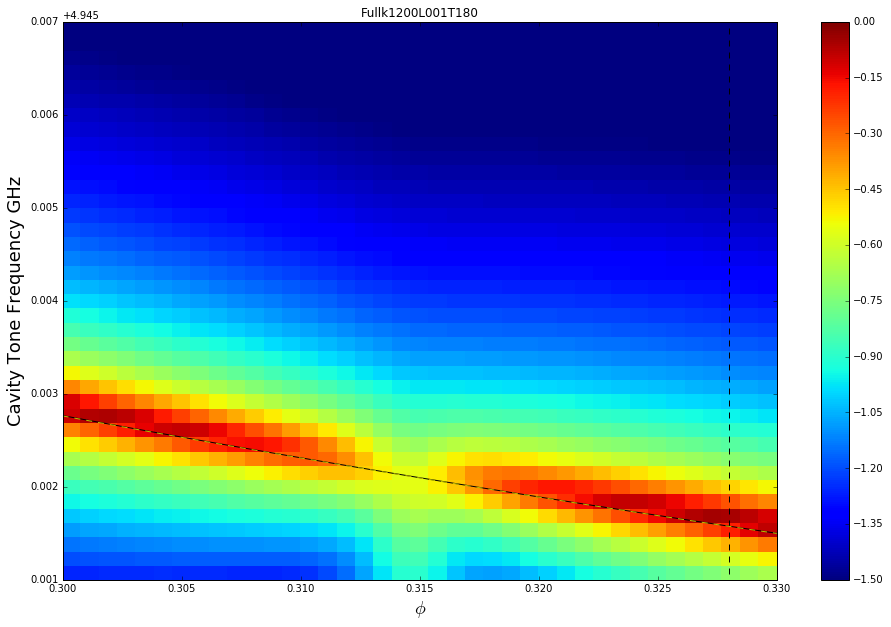

In [21]:
# Plot Graphic II
fig, axes = subplots(1,1, figsize=(16,10))
y_inf = y_i
y_sup = y_f
x_inf = x_i
x_sup = x_f

for n in range(len(energies[0,:])):
    axes.plot(phi/pi, (energies[:,n]-energies[:,0]),'-',linewidth=1)
    axes.plot(phi/pi, (energies[:,n]-energies[:,0])/2,'--')
    
#     if n < 4:
#         axes.text(.2,energies[0,n]-energies[0,0],r'|%s>'%(n),fontsize=20)
    
axes.set_title('Fullk1200L001T180')
#axes.set_ylim(5.00, 5.006)
axes.set_ylim(y_inf, y_sup)
axes.set_xlim(x_inf,x_sup)


axes.set_xlabel(r'$\phi$', fontsize=18)
axes.set_ylabel(r'Cavity Tone Frequency GHz', fontsize=18)
#axes.hlines(w_nr,x_i,x_f,linestyles='dashed')
#axes.hlines(w_c,x_i,x_f,linestyles='dashed')
# axes.vlines(0.245,0,10,linestyles='dashed',linewidth=3)
axes.vlines(0.328,0,10,linestyles='dashed')

im = axes.pcolor(phi/pi,y_vec,transpose(log10(abs(tr_c)/cts)),vmin=-1.5,vmax=0)#0.597686axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
# ax[0,0].set_xlim(4.27,4.39)
#ax[0,0].set_ylim(5.002,5.008)
# axes.set_ylabel(r'Qubit Tone Power(dBm)',fontsize=10)
# axes.set_xlabel(r'Qubit Tone Frequency (GHz)',fontsize=10)
# axes.set_title(r'$Tr[\rho\sigma_z]$',fontsize=20)

In [213]:
file = '/Users/rouxinol/Dropbox/Electromechanical Systems/DATA/Simulation_Plots/V65NEW'

data = qload(file)

Loaded list object.


In [171]:
data2 = asarray(data)

In [182]:
lin = 100
col = 100

In [172]:
tr_c = reshape(data2[:,0],(-1,lin) )

In [255]:
file2 = '/Users/rouxinol/Dropbox/Electromechanical Systems/DATA/Simulation_Plots/V45NEW.txt'
# savetxt(file2,tr_c, delimiter=' ',fmt='%.4e%+.4ej '*col) 

In [256]:
b = loadtxt(file2 , dtype=np.complex128)


In [249]:
# amax(abs(a))

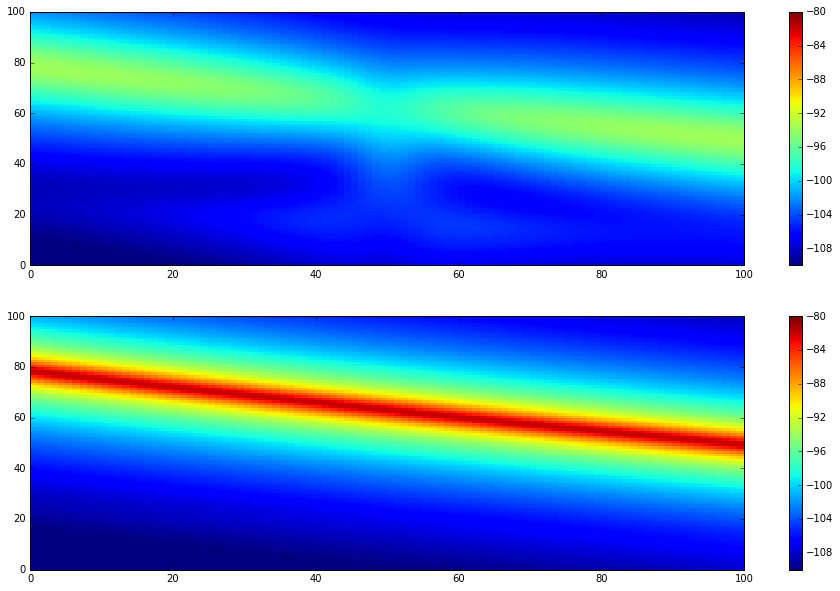

In [290]:
fig, axes = subplots(2,1, figsize=(16,10))
# pcolor()
Zmin=-110
Zmax=-80

im = axes[0].pcolor(20*log10(abs(a.T))-75,vmin=Zmin, vmax=Zmax)#0.597686axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)

fig.colorbar(im, ax=axes[0])

im = axes[1].pcolor(20*log10(abs(b.T))-75,vmin=Zmin, vmax=Zmax)

fig.colorbar(im, ax=axes[1])

In [193]:
file = '/Users/rouxinol/Dropbox/Electromechanical Systems/DATA/Simulation_Plots/flux.txt'
x_i,x_f = 0.3,0.33
phi = linspace(x_i,x_f,100)

savetxt(file,phi)



In [192]:
file = '/Users/rouxinol/Dropbox/Electromechanical Systems/DATA/Simulation_Plots/freq.txt'
y_i,y_f = 4.946,4.952
y_vec = linspace(y_i,y_f,100) 

savetxt(file,y_vec)



In [179]:
def convertQutipTotxt(file, lin=100, col=100):
    '''
    convert file from .qu format (complex) to a txt format
    to load the file use: a = loadtxt(file_path , dtype=np.complex128)
    '''
#     file = '/Users/rouxinol/Dropbox/Electromechanical Systems/DATA/Simulation_Plots/V65NEW'
    data = qload(file)
    data2 = asarray(data)
#     lin = 100
#     col = 100
    tr_c = reshape(data2[:,0],(-1,lin) )
    savetxt(file, tr_c, delimiter=' ',fmt='%.10e%+.10ej '*col) 
    a = loadtxt(file2 , dtype=np.complex128)

In [180]:
convertQutipTotxt(file)

Loaded list object.


In [ ]:
# qsave(results,name='V45NEW')
qsave(results,name='V65NEW')

In [ ]:
# Plot Graphic II
fig, axes = subplots(1,1, figsize=(16,10))
y_inf = y_i
y_sup = y_f
x_inf = x_i
x_sup = x_f

for n in range(len(energies[0,:])):
    axes.plot(phi/pi, (energies[:,n]-energies[:,0]),'-',linewidth=1)
    axes.plot(phi/pi, (energies[:,n]-energies[:,0])/2,'--')
    
#     if n < 4:
#         axes.text(.2,energies[0,n]-energies[0,0],r'|%s>'%(n),fontsize=20)
    
axes.set_title('Fullk1200L001T180')
#axes.set_ylim(5.00, 5.006)
axes.set_ylim(y_inf, y_sup)
axes.set_xlim(x_inf,x_sup)


axes.set_xlabel(r'$\phi$', fontsize=18)
axes.set_ylabel(r'Cavity Tone Frequency GHz', fontsize=18)
#axes.hlines(w_nr,x_i,x_f,linestyles='dashed')
#axes.hlines(w_c,x_i,x_f,linestyles='dashed')
# axes.vlines(0.245,0,10,linestyles='dashed',linewidth=3)
axes.vlines(0.328,0,10,linestyles='dashed')

im = axes.pcolor(phi/pi,y_vec,transpose(log10(abs(tr_c)/cts)),vmin=-1.5,vmax=0)#0.597686axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
# ax[0,0].set_xlim(4.27,4.39)
#ax[0,0].set_ylim(5.002,5.008)
# axes.set_ylabel(r'Qubit Tone Power(dBm)',fontsize=10)
# axes.set_xlabel(r'Qubit Tone Frequency (GHz)',fontsize=10)
# axes.set_title(r'$Tr[\rho\sigma_z]$',fontsize=20)

In [ ]:
qsave(results,name='V55NEW')

In [ ]:
# Plot Graphic II
fig, axes = subplots(1,1, figsize=(16,10))
y_inf = y_i
y_sup = y_f
x_inf = x_i
x_sup = x_f

for n in range(len(energies[0,:])):
    axes.plot(phi/pi, (energies[:,n]-energies[:,0]),'-',linewidth=1)
    axes.plot(phi/pi, (energies[:,n]-energies[:,0])/2,'--')
    
#     if n < 4:
#         axes.text(.2,energies[0,n]-energies[0,0],r'|%s>'%(n),fontsize=20)
    
axes.set_title('Fullk1200L001T180')
#axes.set_ylim(5.00, 5.006)
axes.set_ylim(y_inf, y_sup)
axes.set_xlim(x_inf,x_sup)


axes.set_xlabel(r'$\phi$', fontsize=18)
axes.set_ylabel(r'Cavity Tone Frequency GHz', fontsize=18)
#axes.hlines(w_nr,x_i,x_f,linestyles='dashed')
#axes.hlines(w_c,x_i,x_f,linestyles='dashed')
# axes.vlines(0.245,0,10,linestyles='dashed',linewidth=3)
axes.vlines(0.328,0,10,linestyles='dashed')

im = axes.pcolor(phi/pi,y_vec,transpose(log10(abs(tr_c)/0.50797347539293303)),vmin=-1.5,vmax=0)#axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
# ax[0,0].set_xlim(4.27,4.39)
#ax[0,0].set_ylim(5.002,5.008)
# axes.set_ylabel(r'Qubit Tone Power(dBm)',fontsize=10)
# axes.set_xlabel(r'Qubit Tone Frequency (GHz)',fontsize=10)
# axes.set_title(r'$Tr[\rho\sigma_z]$',fontsize=20)

In [ ]:
qsave(results,name='V65NEW')

In [ ]:
# Plot Graphic II
fig, axes = subplots(1,1, figsize=(16,10))
y_inf = y_i
y_sup = y_f
x_inf = x_i
x_sup = x_f

for n in range(len(energies[0,:])):
    axes.plot(phi/pi, (energies[:,n]-energies[:,0]),'-',linewidth=1)
    axes.plot(phi/pi, (energies[:,n]-energies[:,0])/2,'--')
    
#     if n < 4:
#         axes.text(.2,energies[0,n]-energies[0,0],r'|%s>'%(n),fontsize=20)
    
axes.set_title('Fullk1200L001T180')
#axes.set_ylim(5.00, 5.006)
axes.set_ylim(y_inf, y_sup)
axes.set_xlim(x_inf,x_sup)


axes.set_xlabel(r'$\phi$', fontsize=18)
axes.set_ylabel(r'Cavity Tone Frequency GHz', fontsize=18)
#axes.hlines(w_nr,x_i,x_f,linestyles='dashed')
#axes.hlines(w_c,x_i,x_f,linestyles='dashed')
# axes.vlines(0.245,0,10,linestyles='dashed',linewidth=3)
axes.vlines(0.328,0,10,linestyles='dashed')

im = axes.pcolor(phi/pi,y_vec,transpose(log10(abs(tr_c))),vmin=-1.5,vmax=0)#axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
# ax[0,0].set_xlim(4.27,4.39)
#ax[0,0].set_ylim(5.002,5.008)
# axes.set_ylabel(r'Qubit Tone Power(dBm)',fontsize=10)
# axes.set_xlabel(r'Qubit Tone Frequency (GHz)',fontsize=10)
# axes.set_title(r'$Tr[\rho\sigma_z]$',fontsize=20)

In [ ]:
# Hamiltonians Functions
# Calc Spectrum
def calc_spectrum_6(N,M,P, w_c, w_nr, w_q, L, g, A, w=0, **kwargs):
    
    Ec = kwargs['Ec']
    # dispersive Qubit CPW NR 
    Delta = w_q - w_c
    delta = w_q - w_nr
    # qubit operators
    s11,s22,s33,s12,s32 = three_level_ops()
    v1,v2,v3 = three_level_basis()
    
    Ts11 = tensor(s11,qeye(M),qeye(P))
    Ts22 = tensor(s22,qeye(M),qeye(P))
    Ts33 = tensor(s33,qeye(M),qeye(P))
    Ts12 = tensor(s12,qeye(M),qeye(P))
    Ts32 = tensor(s32,qeye(M),qeye(P))
    
    Tv1 = tensor(v1,qeye(M),qeye(P))
    Tv2 = tensor(v2,qeye(M),qeye(P))
    Tv3 = tensor(v3,qeye(M),qeye(P))
    
    I = tensor(qeye(3),qeye(M),qeye(P))
    
    
    
    
    
#     sm = tensor(create(2),qeye(M),qeye(P))
#     sz = tensor(sigmaz(),qeye(M),qeye(P))
#     sx = tensor(sigmax(),qeye(M),qeye(P))
#     nq = sm.dag() * sm
#     xq = sm + sm.dag()
#     I = tensor(qeye(2), qeye(M),qeye(P))
    
    
    # mechanical resonator operators
    
    b = tensor(qeye(3),destroy(M),qeye(P))
    n_b = b.dag() * b
    x_b = b.dag() + b
    p_b = b - b.dag()
    
    
    # CPW operators
    
    c = tensor(qeye(3),qeye(M),destroy(P))
    n_c = c.dag() * c
    x_c = c.dag() + c
    p_c = c - c.dag()
    
    # Identity
    
    
    
#      Hamiltonian

    H3 = (w_q - w ) * Ts22 + (2 * w_q - Ec - w) * Ts33
        

    H1 = (w_nr - w )* (b.dag() * b ) + L * (b.dag() * ( Ts12 + sqrt(2) * Ts32.dag() ) 
                                            + b * ( Ts12.dag() + sqrt(2) * Ts32 )
                                           )


    H2 = (w_c - w) * (c.dag() * c )  + g * ( c.dag()*(Ts12 + sqrt(2) * Ts32.dag()) 
                                            + c*(Ts12.dag() + sqrt(2) * Ts32)
                                           )


    H4 = A * (c.dag() + c)
    
    #H5 = 0.01*0.0012*6.5 * (c.dag()*b + c*b.dag())

    
#     Colapse Operators
    
    c_op_list = []
    
    kappa_n =0.00025 # cavity
    #kappa_n =0.0004 # cavity
    #kappa_n =0.0012 # cavity
    #kappa_n =0.002 # cavity
    
    gamma_rel = 0.0002 # qubit
    gamma_dep = 0.001 # qubit
    
    Gamma_m = 0.01 # MR
   
    
    Ta = 60e-3 #k
    Tq = 30e-3 #K
    
    Tb = 60e-3 #k
    #Tb = 90e-3 #k
    #Tb = 150e-3 #k
    #Tb = 300e-3 #k
    
    
    
    n_th_a = 1/(exp(sc.h*w_q*1e9/(sc.k*Ta)-1))
    
    n_th_q = 1/(exp(sc.h*w_q*1e9/(sc.k*Tq)-1))
    
    if Tb == 0:
         n_th_b = 0
    else:
        
        n_th_b = 1/(exp(sc.h*w_nr*1e9/(sc.k*Tb)-1))
    
    # cavity
    c_op_list = []

    rate = kappa_n * (1 + n_th_a)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * c)

    rate = kappa_n * n_th_a
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * c.dag())

    rate = gamma_rel * (1 + n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts12 + sqrt(2) * Ts32.dag())
                        )

    rate = gamma_rel * (n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts12.dag() + sqrt(2) * Ts32)
                        )

    rate = gamma_dep / 2 * (1 + n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts22 + sqrt(2) * Ts33))
        
    rate = Gamma_m * (1 + n_th_b)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * b)

    rate = Gamma_m * n_th_b
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * b.dag())    
        
    
# Solution Type    
    if 'dispersive' in kwargs:
               
        H0 = H1 + H2 + H3 + H4 #+ H5
        rho = steadystate( H0,c_op_list)
        rho_b = rho*n_b
#         rho_a = rho*sz
        rho_c = rho*c
        rho_d = rho*n_c
        
        return rho_c.tr(), rho_b.tr(),rho_d.tr()
    
    if 'energies'in kwargs:
        H = H1 + H2 + H3 + H4
        
        return H.eigenenergies() #+ H4
    

In [ ]:
N = 2
M = 8 #NR
P = 4 #cavity
w_c = 5
w_nr = 3.5
g = 0.08
L = 0.0003*4.5
#L = 0.0003*5.5
#L = 0.0003*6.5
Ej = 15
Ec = 0.223
w = 0
w_q_max = sqrt(8 * Ec * Ej) - Ec
print(w_q_max)
d = 0.10
A = (1/2)*0.0002# field aplitude


# phi = linspace(0,pi/2,200)
x_i,x_f = 0.314,0.342
phi = pi*linspace(x_i,x_f,50)
x_vec =  sqrt( 8 * Ec * Ej* abs(cos(phi))*sqrt(1+(d*tan(phi))**2) )-Ec




kwargs = {'num_cpus':5,'energies':1, 'Ec':Ec}

In [ ]:
# Energies


# variable to count the total number of tasks we need to do; used to create progress bar
task_count =len(x_vec)



# Check number of cpus to be used
if 'num_cpus' in kwargs:
    num_cpu = kwargs['num_cpus']
    if num_cpu == 1:
        print("1 CPU; Serial Simulation")
    else:
        print("Parallel Simulation with %d CPUs " % num_cpu)    
else:
    num_cpu = 1
    print("Serial Simulation")



## Program to run function in parallel: 

try:
    t_start = time.time() # start time simulation
    time_1 = []
    pool = mp.Pool(processes=num_cpu) #  create the initial pool to run the simulation   
#         manager = mp.Manager()
#         queue = manager.Queue()


#         _update_progress_bar(1)
#     task_args = a,z
    results = [pool.apply_async(calc_spectrum_6,(N,
                                                 M,
                                                 P,
                                                 w_c,
                                                 w_nr,
                                                 a1,
                                                 L,
                                                 g,
                                                 A,
                                                 w),kwargs
                                ,callback=None,error_callback=None) for a1 in x_vec]



    #####N,M,P, w_c,w_nr, w_q,L,g,A,w=0
    while True:
        incomplete_count = sum(1 for x in results if not x.ready())

        if incomplete_count == 0:
            print("[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s", end="\r")
            print( "\nAll done! \nTotal time:%s"%datetime.timedelta(seconds=int(dif_time)))
            break

        else:

            p = float(task_count - incomplete_count) / task_count * 100 

            dif_time = (time.time() - t_start)    

#                 
            if p > 0:
                rem_time = (datetime.timedelta(seconds=int(dif_time*(100-p)/p)))

#                     rem_time_1 = (datetime.timedelta(seconds=int(dif_time/(task_count-incomplete_count))))
                time_1.append(float(dif_time/(task_count-  incomplete_count)))
#                     rem_time_1 = mean(time_1) *task_count
#                     rem_time_1 = (datetime.timedelta( seconds=int(mean(time_1) *task_count)))
                rem_time_1 = time.strftime("%Z - %Y/%m/%d, %H:%M:%S", time.localtime(t_start+mean(time_1) *task_count))
            else:
                rem_time = '?'
                rem_time_1 = 0


            print("[%4.1f%%] of the simulations calculated, Estimated Remaining time: %s, (%s)"
                  %(p,rem_time,rem_time_1) , end="\r")

            time.sleep(.25)


    while not all([ar.ready() for ar in results]):

        for ar in results:    
            ar.wait(timeout=0.1)

    pool.terminate()
    pool.join()

except KeyboardInterrupt as e:
    pool.terminate()
    pool.join()
    raise e




energies_temp = [ar.get() for ar in results]
energies = asarray(energies_temp)





In [ ]:
y_i,y_f = 5.001,5.007
y_vec = linspace(y_i,y_f,50) 
a , b = zip(*itertools.product(x_vec,y_vec))
kwargs = {'num_cpus':11,'dispersive':1, 'Ec':Ec}

In [ ]:
# Run Spectrum
# Create from the original vectors the new vector with the correct number copies
a , b = zip(*itertools.product(x_vec,y_vec))
# variable to count the total number of tasks we need to do; used to create progress bar
task_count =len(x_vec)*len(y_vec)

# Check number of cpus to be used
if 'num_cpus' in kwargs:
    num_cpu = kwargs['num_cpus']
    if num_cpu == 1:
        print("1 CPU; Serial Simulation")
    else:
        print("Parallel Simulation with %d CPUs " % num_cpu)    
else:
    num_cpu = 1
    print("Serial Simulation")



## Program to run function in parallel: 
t_start = time.time() # start time simulation
time_1 = []
try:
    pool = mp.Pool(processes=num_cpu) #  create the initial pool to run the simulation   
#         manager = mp.Manager()
#         queue = manager.Queue()


#         _update_progress_bar(1)
#     task_args = a,z
    results = [pool.apply_async(calc_spectrum_6,(N,
                                                 M,
                                                 P,
                                                 w_c,
                                                 w_nr,
                                                 a1,
                                                 L,
                                                 g,
                                                 A,
                                                 b1),kwargs
                                ,callback=None,error_callback=None) for a1,b1 in zip(a,b)]



        #####
    while True:
        incomplete_count = sum(1 for x in results if not x.ready())

        if incomplete_count == 0:
            print("[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s", end="\r")
            print( "\nAll done! \nMean time:%f"%(dif_time/task_count))
            print( "\nTotal time:%s"%datetime.timedelta(seconds=int(dif_time)))
            break

        else:

            p = float(task_count - incomplete_count) / task_count * 100 

            dif_time = (time.time() - t_start)    

#                 
            if p > 0:
                rem_time = (datetime.timedelta(seconds=int(dif_time*(100-p)/p)))

#                     rem_time_1 = (datetime.timedelta(seconds=int(dif_time/(task_count-incomplete_count))))
                time_1.append(float(dif_time/(task_count -  incomplete_count)))
#                     rem_time_1 = mean(time_1) *task_count
#                     rem_time_1 = (datetime.timedelta( seconds=int(mean(time_1) *task_count)))
                rem_time_1 = time.strftime("%Z - %Y/%m/%d, %H:%M:%S", time.localtime(t_start+mean(time_1) *task_count))
            else:
                rem_time = '?'
                rem_time_1 = 0


            print("[%4.1f%%] of the simulations calculated, Estimated Remaining time: %s, (%s)"
                  %(p,rem_time,rem_time_1) , end="\r")

            time.sleep(.25)


    while not all([ar.ready() for ar in results]):

        for ar in results:    
            ar.wait(timeout=0.1)

    pool.terminate()
    pool.join()

except KeyboardInterrupt as e:
    pool.terminate()
    pool.join()
    raise e




results = [ar.get() for ar in results]



In [ ]:
# Reshape Results
#results = qload('Two_Dispersive_Simulation')
results_1 = asarray(results)
#qsave(results,name='k1200L3T100')
#qsave(results,name='Two_Dispersive_Simulation')
# qsave(results,name='ThirtytyVolts')

tr_c = reshape(results_1[:,0],(-1,len(y_vec+1)))

In [ ]:
# Plot Graphic II
fig, axes = subplots(1,1, figsize=(16,10))
y_inf = y_i
y_sup = y_f
x_inf = x_i
x_sup = x_f

for n in range(len(energies[0,:])):
    axes.plot(phi/pi, (energies[:,n]-energies[:,0]),'-',linewidth=1)
    axes.plot(phi/pi, (energies[:,n]-energies[:,0])/2,'--')
    
#     if n < 4:
#         axes.text(.2,energies[0,n]-energies[0,0],r'|%s>'%(n),fontsize=20)
    
axes.set_title('Fullk1200L001T180')
#axes.set_ylim(5.00, 5.006)
axes.set_ylim(y_inf, y_sup)
axes.set_xlim(x_inf,x_sup)


axes.set_xlabel(r'$\phi$', fontsize=18)
axes.set_ylabel(r'Cavity Tone Frequency GHz', fontsize=18)
#axes.hlines(w_nr,x_i,x_f,linestyles='dashed')
#axes.hlines(w_c,x_i,x_f,linestyles='dashed')
# axes.vlines(0.245,0,10,linestyles='dashed',linewidth=3)
axes.vlines(0.328,0,10,linestyles='dashed')

im = axes.pcolor(phi/pi,y_vec,transpose(log10(abs(tr_c)/0.597686)),vmin=-1.5,vmax=0)#0.597686axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
# ax[0,0].set_xlim(4.27,4.39)
#ax[0,0].set_ylim(5.002,5.008)
# axes.set_ylabel(r'Qubit Tone Power(dBm)',fontsize=10)
# axes.set_xlabel(r'Qubit Tone Frequency (GHz)',fontsize=10)
# axes.set_title(r'$Tr[\rho\sigma_z]$',fontsize=20)

In [ ]:
# Hamiltonians Functions
# Calc Spectrum
def calc_spectrum_6(N,M,P, w_c, w_nr, w_q, L, g, A, w=0, **kwargs):
    
    Ec = kwargs['Ec']
    # dispersive Qubit CPW NR 
    Delta = w_q - w_c
    delta = w_q - w_nr
    # qubit operators
    s11,s22,s33,s12,s32 = three_level_ops()
    v1,v2,v3 = three_level_basis()
    
    Ts11 = tensor(s11,qeye(M),qeye(P))
    Ts22 = tensor(s22,qeye(M),qeye(P))
    Ts33 = tensor(s33,qeye(M),qeye(P))
    Ts12 = tensor(s12,qeye(M),qeye(P))
    Ts32 = tensor(s32,qeye(M),qeye(P))
    
    Tv1 = tensor(v1,qeye(M),qeye(P))
    Tv2 = tensor(v2,qeye(M),qeye(P))
    Tv3 = tensor(v3,qeye(M),qeye(P))
    
    I = tensor(qeye(3),qeye(M),qeye(P))
    
    
    
    
    
#     sm = tensor(create(2),qeye(M),qeye(P))
#     sz = tensor(sigmaz(),qeye(M),qeye(P))
#     sx = tensor(sigmax(),qeye(M),qeye(P))
#     nq = sm.dag() * sm
#     xq = sm + sm.dag()
#     I = tensor(qeye(2), qeye(M),qeye(P))
    
    
    # mechanical resonator operators
    
    b = tensor(qeye(3),destroy(M),qeye(P))
    n_b = b.dag() * b
    x_b = b.dag() + b
    p_b = b - b.dag()
    
    
    # CPW operators
    
    c = tensor(qeye(3),qeye(M),destroy(P))
    n_c = c.dag() * c
    x_c = c.dag() + c
    p_c = c - c.dag()
    
    # Identity
    
    
    
#      Hamiltonian

    H3 = (w_q - w ) * Ts22 + (2 * w_q - Ec - w) * Ts33
        

    H1 = (w_nr - w )* (b.dag() * b ) + L * (b.dag() * ( Ts12 + sqrt(2) * Ts32.dag() ) 
                                            + b * ( Ts12.dag() + sqrt(2) * Ts32 )
                                           )


    H2 = (w_c - w) * (c.dag() * c )  + g * ( c.dag()*(Ts12 + sqrt(2) * Ts32.dag()) 
                                            + c*(Ts12.dag() + sqrt(2) * Ts32)
                                           )


    H4 = A * (c.dag() + c)
    
    #H5 = 0.01*0.0012*6.5 * (c.dag()*b + c*b.dag())

    
#     Colapse Operators
    
    c_op_list = []
    
    #kappa_n =0.00025 # cavity
    kappa_n =0.0004 # cavity
    #kappa_n =0.0012 # cavity
    #kappa_n =0.002 # cavity
    
    gamma_rel = 0.0002 # qubit
    gamma_dep = 0.001 # qubit
    
    Gamma_m = 0.01 # MR
   
    
    Ta = 60e-3 #k
    Tq = 30e-3 #K
    
    #Tb = 30e-3 #k
    Tb = 60e-3 #k
    #Tb = 150e-3 #k
    #Tb = 300e-3 #k
    
    
    
    n_th_a = 1/(exp(sc.h*w_q*1e9/(sc.k*Ta)-1))
    
    n_th_q = 1/(exp(sc.h*w_q*1e9/(sc.k*Tq)-1))
    
    if Tb == 0:
         n_th_b = 0
    else:
        
        n_th_b = 1/(exp(sc.h*w_nr*1e9/(sc.k*Tb)-1))
    
    # cavity
    c_op_list = []

    rate = kappa_n * (1 + n_th_a)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * c)

    rate = kappa_n * n_th_a
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * c.dag())

    rate = gamma_rel * (1 + n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts12 + sqrt(2) * Ts32.dag())
                        )

    rate = gamma_rel * (n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts12.dag() + sqrt(2) * Ts32)
                        )

    rate = gamma_dep / 2 * (1 + n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts22 + sqrt(2) * Ts33))
        
    rate = Gamma_m * (1 + n_th_b)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * b)

    rate = Gamma_m * n_th_b
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * b.dag())    
        
    
# Solution Type    
    if 'dispersive' in kwargs:
               
        H0 = H1 + H2 + H3 + H4 #+ H5
        rho = steadystate( H0,c_op_list)
        rho_b = rho*n_b
#         rho_a = rho*sz
        rho_c = rho*c
        rho_d = rho*n_c
        
        return rho_c.tr(), rho_b.tr(),rho_d.tr()
    
    if 'energies'in kwargs:
        H = H1 + H2 + H3 + H4
        
        return H.eigenenergies() #+ H4
    

In [ ]:
N = 2
M = 8 #NR
P = 4 #cavity
w_c = 5
w_nr = 3.5
g = 0.08
#L = 0.0003*4.5
L = 0.0003*5.5
#L = 0.0003*6.5
Ej = 15
Ec = 0.223
w = 0
w_q_max = sqrt(8 * Ec * Ej) - Ec
print(w_q_max)
d = 0.10
A = (1/2)*0.0002# field aplitude


# phi = linspace(0,pi/2,200)
x_i,x_f = 0.314,0.342
phi = pi*linspace(x_i,x_f,50)
x_vec =  sqrt( 8 * Ec * Ej* abs(cos(phi))*sqrt(1+(d*tan(phi))**2) )-Ec




kwargs = {'num_cpus':11,'energies':1, 'Ec':Ec}

In [ ]:
# Energies


# variable to count the total number of tasks we need to do; used to create progress bar
task_count =len(x_vec)



# Check number of cpus to be used
if 'num_cpus' in kwargs:
    num_cpu = kwargs['num_cpus']
    if num_cpu == 1:
        print("1 CPU; Serial Simulation")
    else:
        print("Parallel Simulation with %d CPUs " % num_cpu)    
else:
    num_cpu = 1
    print("Serial Simulation")



## Program to run function in parallel: 

try:
    t_start = time.time() # start time simulation
    time_1 = []
    pool = mp.Pool(processes=num_cpu) #  create the initial pool to run the simulation   
#         manager = mp.Manager()
#         queue = manager.Queue()


#         _update_progress_bar(1)
#     task_args = a,z
    results = [pool.apply_async(calc_spectrum_6,(N,
                                                 M,
                                                 P,
                                                 w_c,
                                                 w_nr,
                                                 a1,
                                                 L,
                                                 g,
                                                 A,
                                                 w),kwargs
                                ,callback=None,error_callback=None) for a1 in x_vec]



    #####N,M,P, w_c,w_nr, w_q,L,g,A,w=0
    while True:
        incomplete_count = sum(1 for x in results if not x.ready())

        if incomplete_count == 0:
            print("[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s", end="\r")
            print( "\nAll done! \nTotal time:%s"%datetime.timedelta(seconds=int(dif_time)))
            break

        else:

            p = float(task_count - incomplete_count) / task_count * 100 

            dif_time = (time.time() - t_start)    

#                 
            if p > 0:
                rem_time = (datetime.timedelta(seconds=int(dif_time*(100-p)/p)))

#                     rem_time_1 = (datetime.timedelta(seconds=int(dif_time/(task_count-incomplete_count))))
                time_1.append(float(dif_time/(task_count-  incomplete_count)))
#                     rem_time_1 = mean(time_1) *task_count
#                     rem_time_1 = (datetime.timedelta( seconds=int(mean(time_1) *task_count)))
                rem_time_1 = time.strftime("%Z - %Y/%m/%d, %H:%M:%S", time.localtime(t_start+mean(time_1) *task_count))
            else:
                rem_time = '?'
                rem_time_1 = 0


            print("[%4.1f%%] of the simulations calculated, Estimated Remaining time: %s, (%s)"
                  %(p,rem_time,rem_time_1) , end="\r")

            time.sleep(.25)


    while not all([ar.ready() for ar in results]):

        for ar in results:    
            ar.wait(timeout=0.1)

    pool.terminate()
    pool.join()

except KeyboardInterrupt as e:
    pool.terminate()
    pool.join()
    raise e




energies_temp = [ar.get() for ar in results]
energies = asarray(energies_temp)





In [ ]:
y_i,y_f = 5.001,5.007
y_vec = linspace(y_i,y_f,50) 
a , b = zip(*itertools.product(x_vec,y_vec))
kwargs = {'num_cpus':11,'dispersive':1, 'Ec':Ec}

In [ ]:
# Run Spectrum
# Create from the original vectors the new vector with the correct number copies
a , b = zip(*itertools.product(x_vec,y_vec))
# variable to count the total number of tasks we need to do; used to create progress bar
task_count =len(x_vec)*len(y_vec)

# Check number of cpus to be used
if 'num_cpus' in kwargs:
    num_cpu = kwargs['num_cpus']
    if num_cpu == 1:
        print("1 CPU; Serial Simulation")
    else:
        print("Parallel Simulation with %d CPUs " % num_cpu)    
else:
    num_cpu = 1
    print("Serial Simulation")



## Program to run function in parallel: 
t_start = time.time() # start time simulation
time_1 = []
try:
    pool = mp.Pool(processes=num_cpu) #  create the initial pool to run the simulation   
#         manager = mp.Manager()
#         queue = manager.Queue()


#         _update_progress_bar(1)
#     task_args = a,z
    results = [pool.apply_async(calc_spectrum_6,(N,
                                                 M,
                                                 P,
                                                 w_c,
                                                 w_nr,
                                                 a1,
                                                 L,
                                                 g,
                                                 A,
                                                 b1),kwargs
                                ,callback=None,error_callback=None) for a1,b1 in zip(a,b)]



        #####
    while True:
        incomplete_count = sum(1 for x in results if not x.ready())

        if incomplete_count == 0:
            print("[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s", end="\r")
            print( "\nAll done! \nMean time:%f"%(dif_time/task_count))
            print( "\nTotal time:%s"%datetime.timedelta(seconds=int(dif_time)))
            break

        else:

            p = float(task_count - incomplete_count) / task_count * 100 

            dif_time = (time.time() - t_start)    

#                 
            if p > 0:
                rem_time = (datetime.timedelta(seconds=int(dif_time*(100-p)/p)))

#                     rem_time_1 = (datetime.timedelta(seconds=int(dif_time/(task_count-incomplete_count))))
                time_1.append(float(dif_time/(task_count -  incomplete_count)))
#                     rem_time_1 = mean(time_1) *task_count
#                     rem_time_1 = (datetime.timedelta( seconds=int(mean(time_1) *task_count)))
                rem_time_1 = time.strftime("%Z - %Y/%m/%d, %H:%M:%S", time.localtime(t_start+mean(time_1) *task_count))
            else:
                rem_time = '?'
                rem_time_1 = 0


            print("[%4.1f%%] of the simulations calculated, Estimated Remaining time: %s, (%s)"
                  %(p,rem_time,rem_time_1) , end="\r")

            time.sleep(.25)


    while not all([ar.ready() for ar in results]):

        for ar in results:    
            ar.wait(timeout=0.1)

    pool.terminate()
    pool.join()

except KeyboardInterrupt as e:
    pool.terminate()
    pool.join()
    raise e




results = [ar.get() for ar in results]



In [ ]:
# Reshape Results
#results = qload('Two_Dispersive_Simulation')
results_1 = asarray(results)
#qsave(results,name='k1200L3T100')
#qsave(results,name='Two_Dispersive_Simulation')
# qsave(results,name='ThirtytyVolts')

tr_c = reshape(results_1[:,0],(-1,len(y_vec+1)))

In [ ]:
# Plot Graphic II
fig, axes = subplots(1,1, figsize=(16,10))
y_inf = y_i
y_sup = y_f
x_inf = x_i
x_sup = x_f

for n in range(len(energies[0,:])):
    axes.plot(phi/pi, (energies[:,n]-energies[:,0]),'-',linewidth=1)
    axes.plot(phi/pi, (energies[:,n]-energies[:,0])/2,'--')
    
#     if n < 4:
#         axes.text(.2,energies[0,n]-energies[0,0],r'|%s>'%(n),fontsize=20)
    
axes.set_title('Fullk1200L001T180')
#axes.set_ylim(5.00, 5.006)
axes.set_ylim(y_inf, y_sup)
axes.set_xlim(x_inf,x_sup)


axes.set_xlabel(r'$\phi$', fontsize=18)
axes.set_ylabel(r'Cavity Tone Frequency GHz', fontsize=18)
#axes.hlines(w_nr,x_i,x_f,linestyles='dashed')
#axes.hlines(w_c,x_i,x_f,linestyles='dashed')
# axes.vlines(0.245,0,10,linestyles='dashed',linewidth=3)
axes.vlines(0.328,0,10,linestyles='dashed')

im = axes.pcolor(phi/pi,y_vec,transpose(log10(abs(tr_c)/0.597686)),vmin=-1.5,vmax=0)#0.597686axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
# ax[0,0].set_xlim(4.27,4.39)
#ax[0,0].set_ylim(5.002,5.008)
# axes.set_ylabel(r'Qubit Tone Power(dBm)',fontsize=10)
# axes.set_xlabel(r'Qubit Tone Frequency (GHz)',fontsize=10)
# axes.set_title(r'$Tr[\rho\sigma_z]$',fontsize=20)

In [ ]:
# Hamiltonians Functions
# Calc Spectrum
def calc_spectrum_6(N,M,P, w_c, w_nr, w_q, L, g, A, w=0, **kwargs):
    
    Ec = kwargs['Ec']
    # dispersive Qubit CPW NR 
    Delta = w_q - w_c
    delta = w_q - w_nr
    # qubit operators
    s11,s22,s33,s12,s32 = three_level_ops()
    v1,v2,v3 = three_level_basis()
    
    Ts11 = tensor(s11,qeye(M),qeye(P))
    Ts22 = tensor(s22,qeye(M),qeye(P))
    Ts33 = tensor(s33,qeye(M),qeye(P))
    Ts12 = tensor(s12,qeye(M),qeye(P))
    Ts32 = tensor(s32,qeye(M),qeye(P))
    
    Tv1 = tensor(v1,qeye(M),qeye(P))
    Tv2 = tensor(v2,qeye(M),qeye(P))
    Tv3 = tensor(v3,qeye(M),qeye(P))
    
    I = tensor(qeye(3),qeye(M),qeye(P))
    
    
    
    
    
#     sm = tensor(create(2),qeye(M),qeye(P))
#     sz = tensor(sigmaz(),qeye(M),qeye(P))
#     sx = tensor(sigmax(),qeye(M),qeye(P))
#     nq = sm.dag() * sm
#     xq = sm + sm.dag()
#     I = tensor(qeye(2), qeye(M),qeye(P))
    
    
    # mechanical resonator operators
    
    b = tensor(qeye(3),destroy(M),qeye(P))
    n_b = b.dag() * b
    x_b = b.dag() + b
    p_b = b - b.dag()
    
    
    # CPW operators
    
    c = tensor(qeye(3),qeye(M),destroy(P))
    n_c = c.dag() * c
    x_c = c.dag() + c
    p_c = c - c.dag()
    
    # Identity
    
    
    
#      Hamiltonian

    H3 = (w_q - w ) * Ts22 + (2 * w_q - Ec - w) * Ts33
        

    H1 = (w_nr - w )* (b.dag() * b ) + L * (b.dag() * ( Ts12 + sqrt(2) * Ts32.dag() ) 
                                            + b * ( Ts12.dag() + sqrt(2) * Ts32 )
                                           )


    H2 = (w_c - w) * (c.dag() * c )  + g * ( c.dag()*(Ts12 + sqrt(2) * Ts32.dag()) 
                                            + c*(Ts12.dag() + sqrt(2) * Ts32)
                                           )


    H4 = A * (c.dag() + c)
    
    #H5 = 0.01*0.0012*6.5 * (c.dag()*b + c*b.dag())

    
#     Colapse Operators
    
    c_op_list = []
    
    #kappa_n =0.00025 # cavity
    #kappa_n =0.0004 # cavity
    kappa_n =0.0012 # cavity
    #kappa_n =0.002 # cavity
    
    gamma_rel = 0.0002 # qubit
    gamma_dep = 0.001 # qubit
    
    Gamma_m = 0.01 # MR
   
    
    Ta = 60e-3 #k
    Tq = 30e-3 #K
    
    #Tb = 30e-3 #k
    #Tb = 90e-3 #k
    Tb = 60e-3 #k
    #Tb = 300e-3 #k
    
    
    
    n_th_a = 1/(exp(sc.h*w_q*1e9/(sc.k*Ta)-1))
    
    n_th_q = 1/(exp(sc.h*w_q*1e9/(sc.k*Tq)-1))
    
    if Tb == 0:
         n_th_b = 0
    else:
        
        n_th_b = 1/(exp(sc.h*w_nr*1e9/(sc.k*Tb)-1))
    
    # cavity
    c_op_list = []

    rate = kappa_n * (1 + n_th_a)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * c)

    rate = kappa_n * n_th_a
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * c.dag())

    rate = gamma_rel * (1 + n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts12 + sqrt(2) * Ts32.dag())
                        )

    rate = gamma_rel * (n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts12.dag() + sqrt(2) * Ts32)
                        )

    rate = gamma_dep / 2 * (1 + n_th_q)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * (Ts22 + sqrt(2) * Ts33))
        
    rate = Gamma_m * (1 + n_th_b)
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * b)

    rate = Gamma_m * n_th_b
    if rate > 0.0:
        c_op_list.append(sqrt(rate) * b.dag())    
        
    
# Solution Type    
    if 'dispersive' in kwargs:
               
        H0 = H1 + H2 + H3 + H4 #+ H5
        rho = steadystate( H0,c_op_list)
        rho_b = rho*n_b
#         rho_a = rho*sz
        rho_c = rho*c
        rho_d = rho*n_c
        
        return rho_c.tr(), rho_b.tr(),rho_d.tr()
    
    if 'energies'in kwargs:
        H = H1 + H2 + H3 + H4
        
        return H.eigenenergies() #+ H4
    

In [ ]:
N = 2
M = 8 #NR
P = 4 #cavity
w_c = 5
w_nr = 3.5
g = 0.08
#L = 0.0003*4.5
#L = 0.0003*5.5
L = 0.0003*6.5
Ej = 15
Ec = 0.223
w = 0
w_q_max = sqrt(8 * Ec * Ej) - Ec
print(w_q_max)
d = 0.10
A = (1/2)*0.0002# field aplitude


# phi = linspace(0,pi/2,200)
x_i,x_f = 0.314,0.342
phi = pi*linspace(x_i,x_f,50)
x_vec =  sqrt( 8 * Ec * Ej* abs(cos(phi))*sqrt(1+(d*tan(phi))**2) )-Ec




kwargs = {'num_cpus':11,'energies':1, 'Ec':Ec}

In [ ]:
# Energies


# variable to count the total number of tasks we need to do; used to create progress bar
task_count =len(x_vec)



# Check number of cpus to be used
if 'num_cpus' in kwargs:
    num_cpu = kwargs['num_cpus']
    if num_cpu == 1:
        print("1 CPU; Serial Simulation")
    else:
        print("Parallel Simulation with %d CPUs " % num_cpu)    
else:
    num_cpu = 1
    print("Serial Simulation")



## Program to run function in parallel: 

try:
    t_start = time.time() # start time simulation
    time_1 = []
    pool = mp.Pool(processes=num_cpu) #  create the initial pool to run the simulation   
#         manager = mp.Manager()
#         queue = manager.Queue()


#         _update_progress_bar(1)
#     task_args = a,z
    results = [pool.apply_async(calc_spectrum_6,(N,
                                                 M,
                                                 P,
                                                 w_c,
                                                 w_nr,
                                                 a1,
                                                 L,
                                                 g,
                                                 A,
                                                 w),kwargs
                                ,callback=None,error_callback=None) for a1 in x_vec]



    #####N,M,P, w_c,w_nr, w_q,L,g,A,w=0
    while True:
        incomplete_count = sum(1 for x in results if not x.ready())

        if incomplete_count == 0:
            print("[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s", end="\r")
            print( "\nAll done! \nTotal time:%s"%datetime.timedelta(seconds=int(dif_time)))
            break

        else:

            p = float(task_count - incomplete_count) / task_count * 100 

            dif_time = (time.time() - t_start)    

#                 
            if p > 0:
                rem_time = (datetime.timedelta(seconds=int(dif_time*(100-p)/p)))

#                     rem_time_1 = (datetime.timedelta(seconds=int(dif_time/(task_count-incomplete_count))))
                time_1.append(float(dif_time/(task_count-  incomplete_count)))
#                     rem_time_1 = mean(time_1) *task_count
#                     rem_time_1 = (datetime.timedelta( seconds=int(mean(time_1) *task_count)))
                rem_time_1 = time.strftime("%Z - %Y/%m/%d, %H:%M:%S", time.localtime(t_start+mean(time_1) *task_count))
            else:
                rem_time = '?'
                rem_time_1 = 0


            print("[%4.1f%%] of the simulations calculated, Estimated Remaining time: %s, (%s)"
                  %(p,rem_time,rem_time_1) , end="\r")

            time.sleep(.25)


    while not all([ar.ready() for ar in results]):

        for ar in results:    
            ar.wait(timeout=0.1)

    pool.terminate()
    pool.join()

except KeyboardInterrupt as e:
    pool.terminate()
    pool.join()
    raise e




energies_temp = [ar.get() for ar in results]
energies = asarray(energies_temp)





In [ ]:
y_i,y_f = 5.001,5.007
y_vec = linspace(y_i,y_f,50) 
a , b = zip(*itertools.product(x_vec,y_vec))
kwargs = {'num_cpus':11,'dispersive':1, 'Ec':Ec}

In [ ]:
# Run Spectrum
# Create from the original vectors the new vector with the correct number copies
a , b = zip(*itertools.product(x_vec,y_vec))
# variable to count the total number of tasks we need to do; used to create progress bar
task_count =len(x_vec)*len(y_vec)

# Check number of cpus to be used
if 'num_cpus' in kwargs:
    num_cpu = kwargs['num_cpus']
    if num_cpu == 1:
        print("1 CPU; Serial Simulation")
    else:
        print("Parallel Simulation with %d CPUs " % num_cpu)    
else:
    num_cpu = 1
    print("Serial Simulation")



## Program to run function in parallel: 
t_start = time.time() # start time simulation
time_1 = []
try:
    pool = mp.Pool(processes=num_cpu) #  create the initial pool to run the simulation   
#         manager = mp.Manager()
#         queue = manager.Queue()


#         _update_progress_bar(1)
#     task_args = a,z
    results = [pool.apply_async(calc_spectrum_6,(N,
                                                 M,
                                                 P,
                                                 w_c,
                                                 w_nr,
                                                 a1,
                                                 L,
                                                 g,
                                                 A,
                                                 b1),kwargs
                                ,callback=None,error_callback=None) for a1,b1 in zip(a,b)]



        #####
    while True:
        incomplete_count = sum(1 for x in results if not x.ready())

        if incomplete_count == 0:
            print("[100.0%] of the simulations calculated, Estimated Remaining time: 0.0s", end="\r")
            print( "\nAll done! \nMean time:%f"%(dif_time/task_count))
            print( "\nTotal time:%s"%datetime.timedelta(seconds=int(dif_time)))
            break

        else:

            p = float(task_count - incomplete_count) / task_count * 100 

            dif_time = (time.time() - t_start)    

#                 
            if p > 0:
                rem_time = (datetime.timedelta(seconds=int(dif_time*(100-p)/p)))

#                     rem_time_1 = (datetime.timedelta(seconds=int(dif_time/(task_count-incomplete_count))))
                time_1.append(float(dif_time/(task_count -  incomplete_count)))
#                     rem_time_1 = mean(time_1) *task_count
#                     rem_time_1 = (datetime.timedelta( seconds=int(mean(time_1) *task_count)))
                rem_time_1 = time.strftime("%Z - %Y/%m/%d, %H:%M:%S", time.localtime(t_start+mean(time_1) *task_count))
            else:
                rem_time = '?'
                rem_time_1 = 0


            print("[%4.1f%%] of the simulations calculated, Estimated Remaining time: %s, (%s)"
                  %(p,rem_time,rem_time_1) , end="\r")

            time.sleep(.25)


    while not all([ar.ready() for ar in results]):

        for ar in results:    
            ar.wait(timeout=0.1)

    pool.terminate()
    pool.join()

except KeyboardInterrupt as e:
    pool.terminate()
    pool.join()
    raise e




results = [ar.get() for ar in results]



In [ ]:
# Reshape Results
#results = qload('Two_Dispersive_Simulation')
results_1 = asarray(results)
#qsave(results,name='k1200L3T100')
#qsave(results,name='Two_Dispersive_Simulation')
# qsave(results,name='ThirtytyVolts')

tr_c = reshape(results_1[:,0],(-1,len(y_vec+1)))

In [ ]:
# Plot Graphic II
fig, axes = subplots(1,1, figsize=(16,10))
y_inf = y_i
y_sup = y_f
x_inf = x_i
x_sup = x_f

for n in range(len(energies[0,:])):
    axes.plot(phi/pi, (energies[:,n]-energies[:,0]),'-',linewidth=1)
    axes.plot(phi/pi, (energies[:,n]-energies[:,0])/2,'--')
    
#     if n < 4:
#         axes.text(.2,energies[0,n]-energies[0,0],r'|%s>'%(n),fontsize=20)
    
axes.set_title('Fullk1200L001T180')
#axes.set_ylim(5.00, 5.006)
axes.set_ylim(y_inf, y_sup)
axes.set_xlim(x_inf,x_sup)


axes.set_xlabel(r'$\phi$', fontsize=18)
axes.set_ylabel(r'Cavity Tone Frequency GHz', fontsize=18)
#axes.hlines(w_nr,x_i,x_f,linestyles='dashed')
#axes.hlines(w_c,x_i,x_f,linestyles='dashed')
# axes.vlines(0.245,0,10,linestyles='dashed',linewidth=3)
axes.vlines(0.328,0,10,linestyles='dashed')

im = axes.pcolor(phi/pi,y_vec,transpose(log10(abs(tr_c)/0.597686)),vmin=-1.5,vmax=0)#0.597686axes.pcolor(phi/pi,y_vec,transpose((abs(tr))))#,vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
# ax[0,0].set_xlim(4.27,4.39)
#ax[0,0].set_ylim(5.002,5.008)
# axes.set_ylabel(r'Qubit Tone Power(dBm)',fontsize=10)
# axes.set_xlabel(r'Qubit Tone Frequency (GHz)',fontsize=10)
# axes.set_title(r'$Tr[\rho\sigma_z]$',fontsize=20)